<a href="https://colab.research.google.com/github/erbisti/Collab/blob/main/MNIST_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dispositivo disponível: CPU

Treinando com batch_size = 32, seed = 365
Epoch 1/10
1682/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8928 - loss: 0.3645

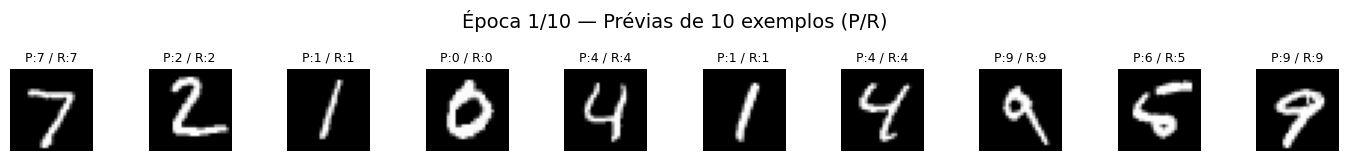

1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8930 - loss: 0.3639 - val_accuracy: 0.9702 - val_loss: 0.0956
Epoch 2/10
1682/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9679 - loss: 0.0983

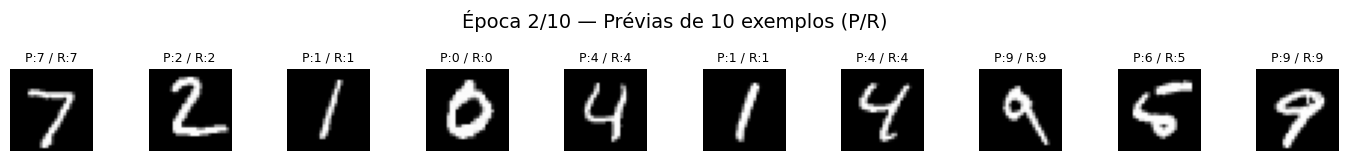

1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9679 - loss: 0.0983 - val_accuracy: 0.9758 - val_loss: 0.0840
Epoch 3/10
1687/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9806 - loss: 0.0601

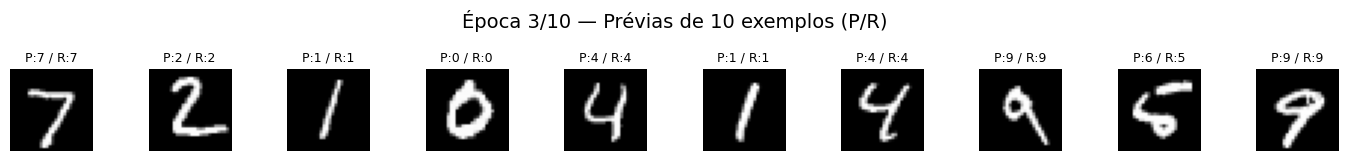

1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9806 - loss: 0.0601 - val_accuracy: 0.9737 - val_loss: 0.0997
Epoch 4/10
1679/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9853 - loss: 0.0467

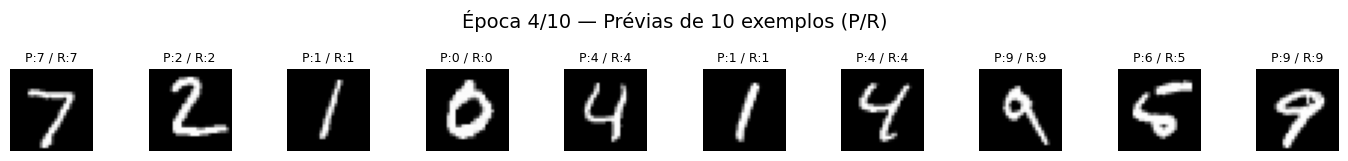

1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9853 - loss: 0.0467 - val_accuracy: 0.9780 - val_loss: 0.0915
Epoch 5/10
1680/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9887 - loss: 0.0319

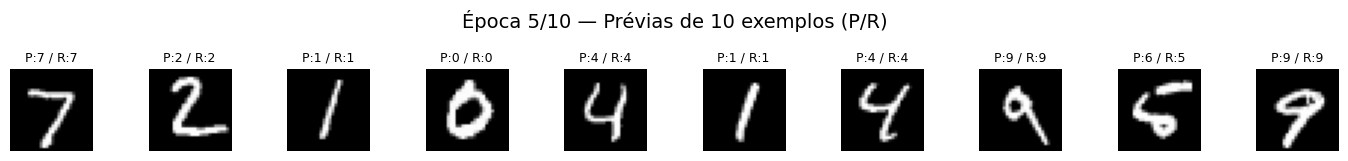

1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9887 - loss: 0.0319 - val_accuracy: 0.9738 - val_loss: 0.1145
Epoch 6/10
1682/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9897 - loss: 0.0314

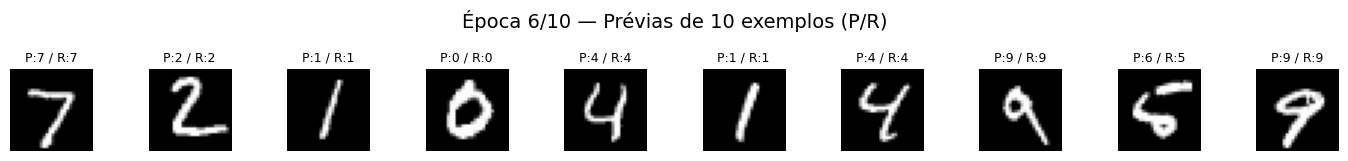

1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9897 - loss: 0.0314 - val_accuracy: 0.9747 - val_loss: 0.1115
Epoch 7/10
1682/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9926 - loss: 0.0230

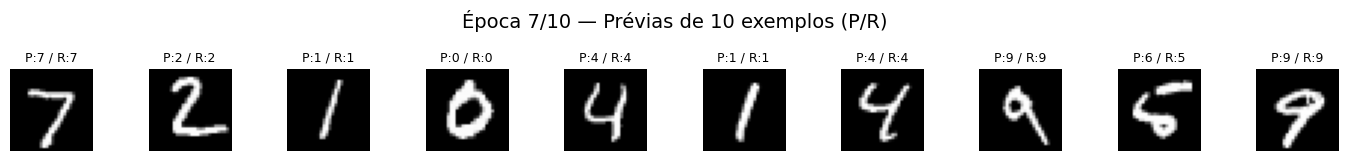

1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9926 - loss: 0.0230 - val_accuracy: 0.9750 - val_loss: 0.1175
Epoch 8/10
1680/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9931 - loss: 0.0206

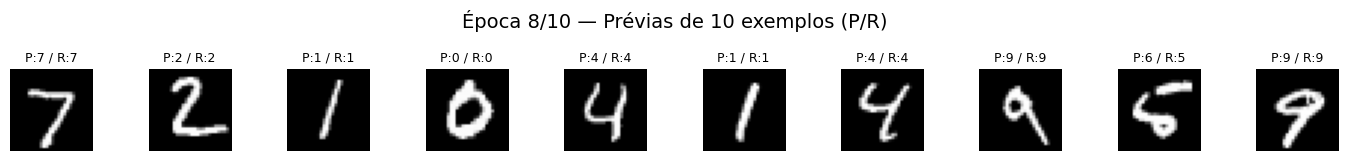

1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9931 - loss: 0.0206 - val_accuracy: 0.9803 - val_loss: 0.1046
Epoch 9/10
1680/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9929 - loss: 0.0217

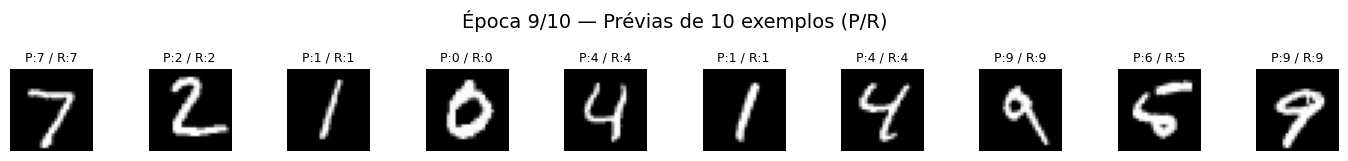

1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9929 - loss: 0.0217 - val_accuracy: 0.9818 - val_loss: 0.0935
Epoch 10/10
1687/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9953 - loss: 0.0144

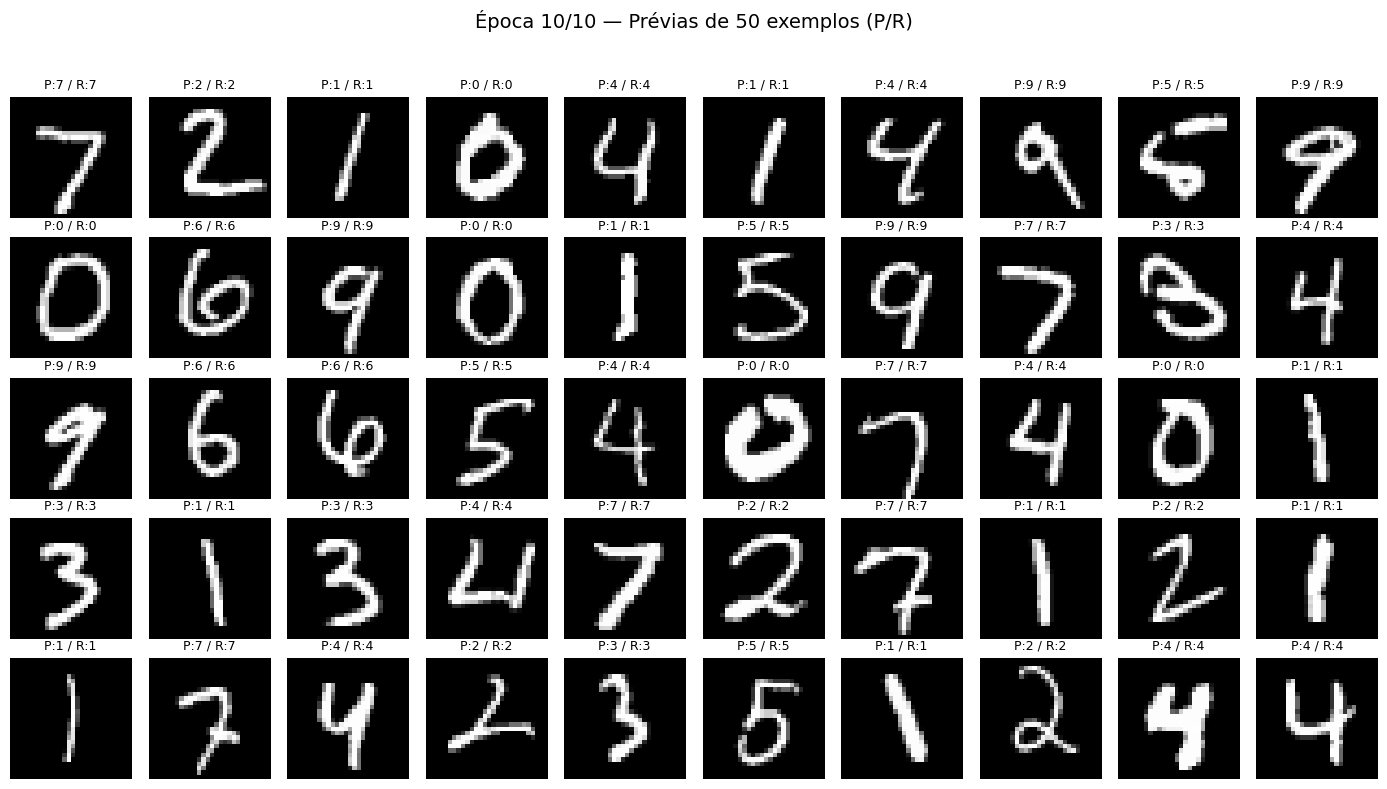

1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9953 - loss: 0.0144 - val_accuracy: 0.9813 - val_loss: 0.0946

Acurácia final no teste (batch=32): 0.9780


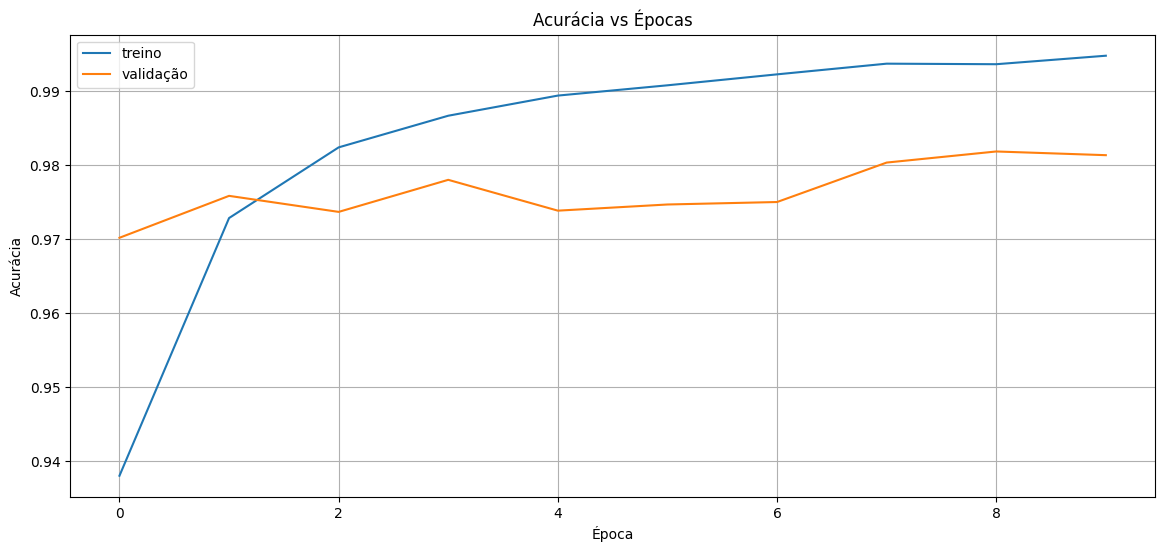

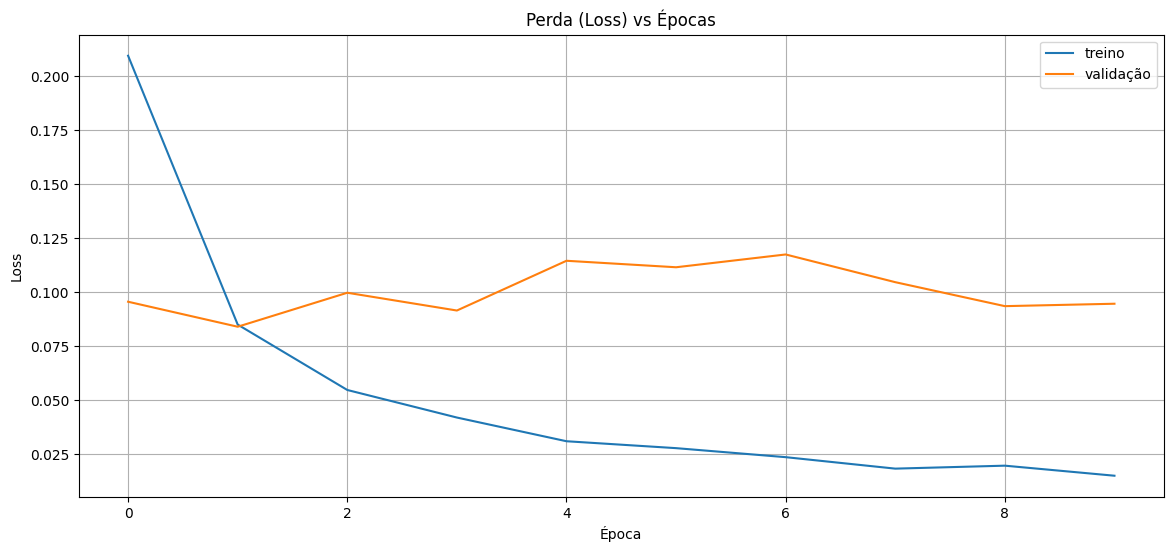

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from math import ceil
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import random, os
from IPython.display import clear_output, display

# ===== Seed fixo para reprodutibilidade =====
SEED = 365
np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)

# ===== Verificação de GPU =====
device_name = tf.test.gpu_device_name()
print(f"Dispositivo disponível: {device_name if device_name else 'CPU'}")

# ===== Dados =====
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train = X_train.astype("float32") / 255.0
X_test  = X_test.astype("float32")  / 255.0
X_train_flat = X_train.reshape((-1, 784))
X_test_flat  = X_test.reshape((-1, 784))

# ===== Parâmetros =====
BATCH_SIZE = 32     # altere aqui
EPOCHS = 10
PRINTS_PER_EPOCH = 10
PRINTS_FINAL = 50

# ===== Callback: mostra IMAGENS por época (10) e no fim (50) =====
class PreviewImagesCallback(keras.callbacks.Callback):
    def __init__(self, x_img, x_flat, y, per_epoch=10, final=50, cols=10):
        super().__init__()
        self.x_img = x_img      # imagens 28x28 para plot
        self.x_flat = x_flat    # vetores 784 para predição
        self.y = y
        self.per_epoch = per_epoch
        self.final = final
        self.cols = cols

    def _plot_grid(self, imgs, y_true, y_pred, title):
        k = len(imgs)
        rows = ceil(k / self.cols)
        fig = plt.figure(figsize=(1.4*self.cols, 1.6*rows))
        for i in range(k):
            ax = plt.subplot(rows, self.cols, i + 1)
            ax.imshow(imgs[i], cmap='gray')
            ax.set_title(f"P:{y_pred[i]} / R:{y_true[i]}", fontsize=9)
            ax.axis('off')
        plt.suptitle(title, fontsize=14)
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        display(fig)
        plt.close(fig)

    def on_epoch_end(self, epoch, logs=None):
        total_epochs = self.params.get('epochs', None)
        is_last = (total_epochs is not None and epoch == total_epochs - 1)
        k = self.final if is_last else self.per_epoch

        # predições nos k primeiros exemplos do conjunto de teste (determinístico)
        preds = self.model.predict(self.x_flat[:k], verbose=0)
        y_pred = np.argmax(preds, axis=1)

        title = f"Época {epoch+1}/{total_epochs} — Prévias de {k} exemplos (P/R)"
        self._plot_grid(self.x_img[:k], self.y[:k], y_pred, title)

# ===== Modelo =====
def build_model():
    model = keras.Sequential([
        layers.Input(shape=(784,)),
        layers.Dense(256, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

print(f"\nTreinando com batch_size = {BATCH_SIZE}, seed = {SEED}")
model = build_model()
history = model.fit(
    X_train_flat, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.1,  # 10% do treino para validação
    verbose=1,
    callbacks=[PreviewImagesCallback(X_test, X_test_flat, y_test,
                                     per_epoch=PRINTS_PER_EPOCH,
                                     final=PRINTS_FINAL,
                                     cols=10)]
)

# ===== Avaliação no teste =====
test_loss, test_acc = model.evaluate(X_test_flat, y_test, verbose=0)
print(f"\nAcurácia final no teste (batch={BATCH_SIZE}): {test_acc:.4f}")

# ===== Curvas de treino/validação =====
plt.figure(figsize=(14, 6))
plt.plot(history.history['accuracy'],     label='treino')
plt.plot(history.history['val_accuracy'], label='validação')
plt.title("Acurácia vs Épocas")
plt.xlabel("Época"); plt.ylabel("Acurácia")
plt.legend(); plt.grid(True); plt.show()

plt.figure(figsize=(14, 6))
plt.plot(history.history['loss'],     label='treino')
plt.plot(history.history['val_loss'], label='validação')
plt.title("Perda (Loss) vs Épocas")
plt.xlabel("Época"); plt.ylabel("Loss")
plt.legend(); plt.grid(True); plt.show()
